In [1]:
import sys
import numpy as np
from math import atan2, asin
from pathlib import Path
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import matplotlib.pyplot as plt
import wandb

In [2]:
!ls /Users/jyao/JIAN/work/SAI/projects/2022/jy_gaze/modules/jcode

ls: cannot access '/Users/jyao/JIAN/work/SAI/projects/2022/jy_gaze/modules/jcode': No such file or directory


In [3]:
sys.path.append('/project/modules/jmodules')
from jutils import SynJSON as SJ

In [4]:
dpath = Path('/project/data/tmp')

In [5]:
pitches = []
yaws = []
pitchesl =[]
yawsl=[]
pitchesr =[]
yawsr = []
iffy_pitches = 0
iffy_yaws = 0
for fold in dpath.glob('fold*'):
    print(f'fold={fold}')
    dpath = dpath/fold
    for jfile in dpath.glob('*.json'):
#         print(jfile)
        sj = SJ(jfile)
        pitch, yaw = sj.pitchyaw2d(radian=False, average=True)
        [pitchl, yawl], [pitchr, yawr] = sj.pitchyaw2d(radian=False, average=False)
        pitches.append(pitch)
        yaws.append(yaw)
        pitchesl.append(pitchl)
        pitchesr.append(pitchr)
        yawsl.append(yawl)
        yawsr.append(yawr)
        if abs(yawl-yawr)>3.0:
            iffy_yaws += 1
#             print(yawl, yawr)
        if abs(pitchl - pitchr)>3.0:
            iffy_pitches += 1

fold=/project/data/tmp/fold03
fold=/project/data/tmp/fold01
fold=/project/data/tmp/fold02


In [6]:
# print(len(pitches), iffy_pitches)
# print(len(yaws), iffy_yaws)

64435 17
64435 64435


(-23.0, 7.0)

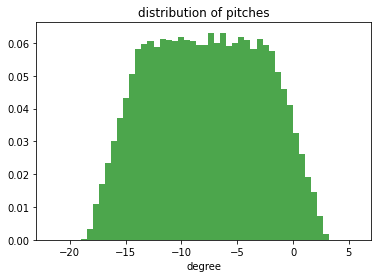

In [7]:
num_bins=50
n, bins, patches = plt.hist(pitches, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
plt.title('distribution of pitches')
plt.xlabel('degree')
plt.xlim(-23, 7)

with wandb.init(project="sample_sdata3_angle_analysis", name='sample_pitches') as run:
    run.log({"data":wandb.Image(plt)})

(-25.0, 25.0)

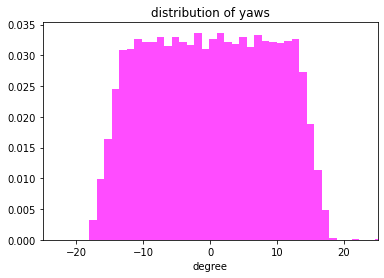

In [8]:
num_bins=50
n, bins, patches = plt.hist(yaws, num_bins, 
                            density = 1, 
                            color ='magenta',
                            alpha = 0.7)
plt.title('distribution of yaws')
plt.xlabel('degree')
plt.xlim(-25, 25)

with wandb.init(project="sample_sdata3_angle_analysis", name='sample_yaws') as run:
    run.log({"data":wandb.Image(plt)})

wandb: Currently logged in as: synthesis-ai (use `wandb login --relogin` to force relogin)


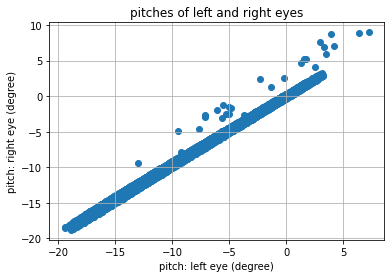

In [9]:
plt.scatter(x=pitchesl, y=pitchesr)
plt.title('pitches of left and right eyes')
plt.xlabel('pitch: left eye (degree)')
plt.ylabel('pitch: right eye (degree)')
plt.grid(visible=True)
with wandb.init(project="sample_sdata3_angle_analysis", name='sample_pitches_corr') as run:
    run.log({"data1":wandb.Image(plt)})

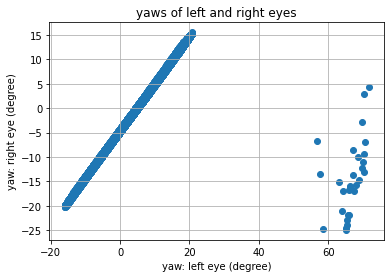

In [10]:
plt.scatter(x=yawsl, y=yawsr)
plt.title('yaws of left and right eyes')
plt.xlabel('yaw: left eye (degree)')
plt.ylabel('yaw: right eye (degree)')
plt.grid(visible=True)

with wandb.init(project="sample_sdata3_angle_analysis", name='sample_yaws_corr') as run:
    run.log({"data1":wandb.Image(plt)})

In [12]:
adiffs = []
for yawl, yawr in zip(yawsl, yawsr):
    adiff = abs(yawl-yawr)
#     print(yawl, yawr, diff)
    adiffs.append(adiff)

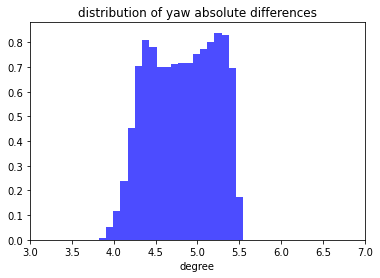

In [14]:
num_bins=1000
n, bins, patches = plt.hist(adiffs, num_bins, 
                            density = 1, 
                            color ='b',
                            alpha = 0.7)
plt.title('distribution of yaw absolute differences')
plt.xlabel('degree')
plt.xlim(3, 7)
with wandb.init(project="sample_sdata3_angle_analysis", name='absolute diffs yaw right and left') as run:
    run.log({"data2":wandb.Image(plt)})

In [15]:
diffs = []
for yawl, yawr in zip(yawsl, yawsr):
    diff = yawl-yawr
    if yawr > yawl:
        print(yawl, yawr, diff)
    diffs.append(diff)


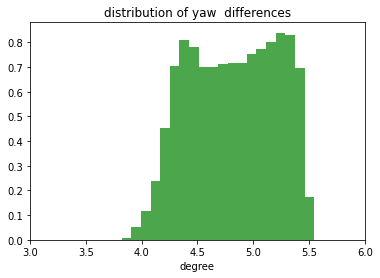

In [16]:
num_bins=1000
n, bins, patches = plt.hist(diffs, num_bins, 
                            density = 1, 
                            color ='g',
                            alpha = 0.7)
plt.title('distribution of yaw  differences')
plt.xlabel('degree')
plt.xlim(3.0, 6)

with wandb.init(project="sample_sdata3_angle_analysis", name='diffs yaw right and left') as run:
    run.log({"data2":wandb.Image(plt)})